In [1]:
import os
import shutil
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from collections import Counter
import random


In [ ]:
def preprocess_char_image(char_img, output_dir=None, filename_prefix="char"):
    """
    Standardized character image preprocessing (with step-by-step saving)

    Parameters:
        char_img: Input BGR color image
        output_dir: Directory to save intermediate results (None to skip saving)
        filename_prefix: Prefix for saved files

    Returns:
        Normalized image and a dictionary containing paths to saved files
    """
    saved_steps = {}
    
    # Step 0: Original image
    if output_dir:
        original_path = os.path.join(output_dir, f"{filename_prefix}_0_original.png")
        cv2.imwrite(original_path, char_img)
        saved_steps["original"] = original_path
    
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(char_img, cv2.COLOR_BGR2GRAY)
    if output_dir:
        gray_path = os.path.join(output_dir, f"{filename_prefix}_1_gray.png")
        cv2.imwrite(gray_path, gray)
        saved_steps["gray"] = gray_path
    
    # Step 2: Binarization (thresholding)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    if output_dir:
        binary_path = os.path.join(output_dir, f"{filename_prefix}_2_binary.png")
        cv2.imwrite(binary_path, binary)
        saved_steps["binary"] = binary_path
    
    # Step 3: Find contours
    contours, _ = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Visualize contours (drawn on original image)
    contour_img = char_img.copy()
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)
    if output_dir:
        contour_path = os.path.join(output_dir, f"{filename_prefix}_3_contours.png")
        cv2.imwrite(contour_path, contour_img)
        saved_steps["contours"] = contour_path
    
    # Step 4: Get bounding box and crop
    if len(contours) == 0:
        raise ValueError("未检测到任何轮廓")
    
    x, y, w, h = cv2.boundingRect(contours[0])
    char_crop = binary[y:y+h, x:x+w]
    
    # Visualize cropping area (bounding box)
    bbox_img = char_img.copy()
    cv2.rectangle(bbox_img, (x, y), (x+w, y+h), (0, 0, 255), 1)
    if output_dir:
        bbox_path = os.path.join(output_dir, f"{filename_prefix}_4_bbox.png")
        cv2.imwrite(bbox_path, bbox_img)
        saved_steps["bbox"] = bbox_path
        
        crop_path = os.path.join(output_dir, f"{filename_prefix}_5_cropped.png")
        cv2.imwrite(crop_path, char_crop)
        saved_steps["cropped"] = crop_path
    
    # Step 5: Pad image to a square shape
    border_size = max(h, w)
    delta_w = border_size - w
    delta_h = border_size - h
    top = delta_h // 2
    bottom = delta_h - top
    left = delta_w // 2
    right = delta_w - left
    
    padded = cv2.copyMakeBorder(char_crop, top, bottom, left, right, 
                               cv2.BORDER_CONSTANT, value=0)
    if output_dir:
        padded_path = os.path.join(output_dir, f"{filename_prefix}_6_padded.png")
        cv2.imwrite(padded_path, padded)
        saved_steps["padded"] = padded_path
    
    # Step 6: Resize to standard dimensions
    target_size = (32, 32)
    resized = cv2.resize(padded, target_size, interpolation=cv2.INTER_AREA)
    if output_dir:
        resized_path = os.path.join(output_dir, f"{filename_prefix}_7_resized.png")
        cv2.imwrite(resized_path, resized)
        saved_steps["resized"] = resized_path
    
    # Step 7: Normalize pixel values
    normalized = resized / 255.0
    
    return normalized.astype(np.float32), saved_steps

In [ ]:
def visualize_preprocessing(saved_steps):
    """Visualize preprocessing steps"""
    steps = [
        ("Original Image", "original"),
        ("Grayscale Image", "gray"),
        ("Binarized Image", "binary"),
        ("Contour Detection", "contours"),
        ("Bounding Box", "bbox"),
        ("Cropped Image", "cropped"),
        ("Padded to Square", "padded"),
        ("Resized to 32x32", "resized")
    ]
    
    plt.figure(figsize=(15, 10))
    for i, (title, key) in enumerate(steps):
        if key in saved_steps:
            img = cv2.imread(saved_steps[key])
            if len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 1):
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            
            plt.subplot(2, 4, i+1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

C:\Users\q Q h\AppData\Local\Temp\ipykernel_5532\2390119418.py:26: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\q Q h\AppData\Local\Temp\ipykernel_5532\2390119418.py:26: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\q Q h\AppData\Local\Temp\ipykernel_5532\2390119418.py:26: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\q Q h\AppData\Local\Temp\ipykernel_5532\2390119418.py:26: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\q Q h\AppData\Local\Temp\ipykernel_5532\2390119418.py:26: UserWarning: Glyph 28784 (\N{CJK UNIFIED IDEOGRAPH-7070}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\q Q h\AppData\Local\Temp\ipykernel_5532\2390119418.py:26: UserWarning: Glyph 24230 (\N{CJK 

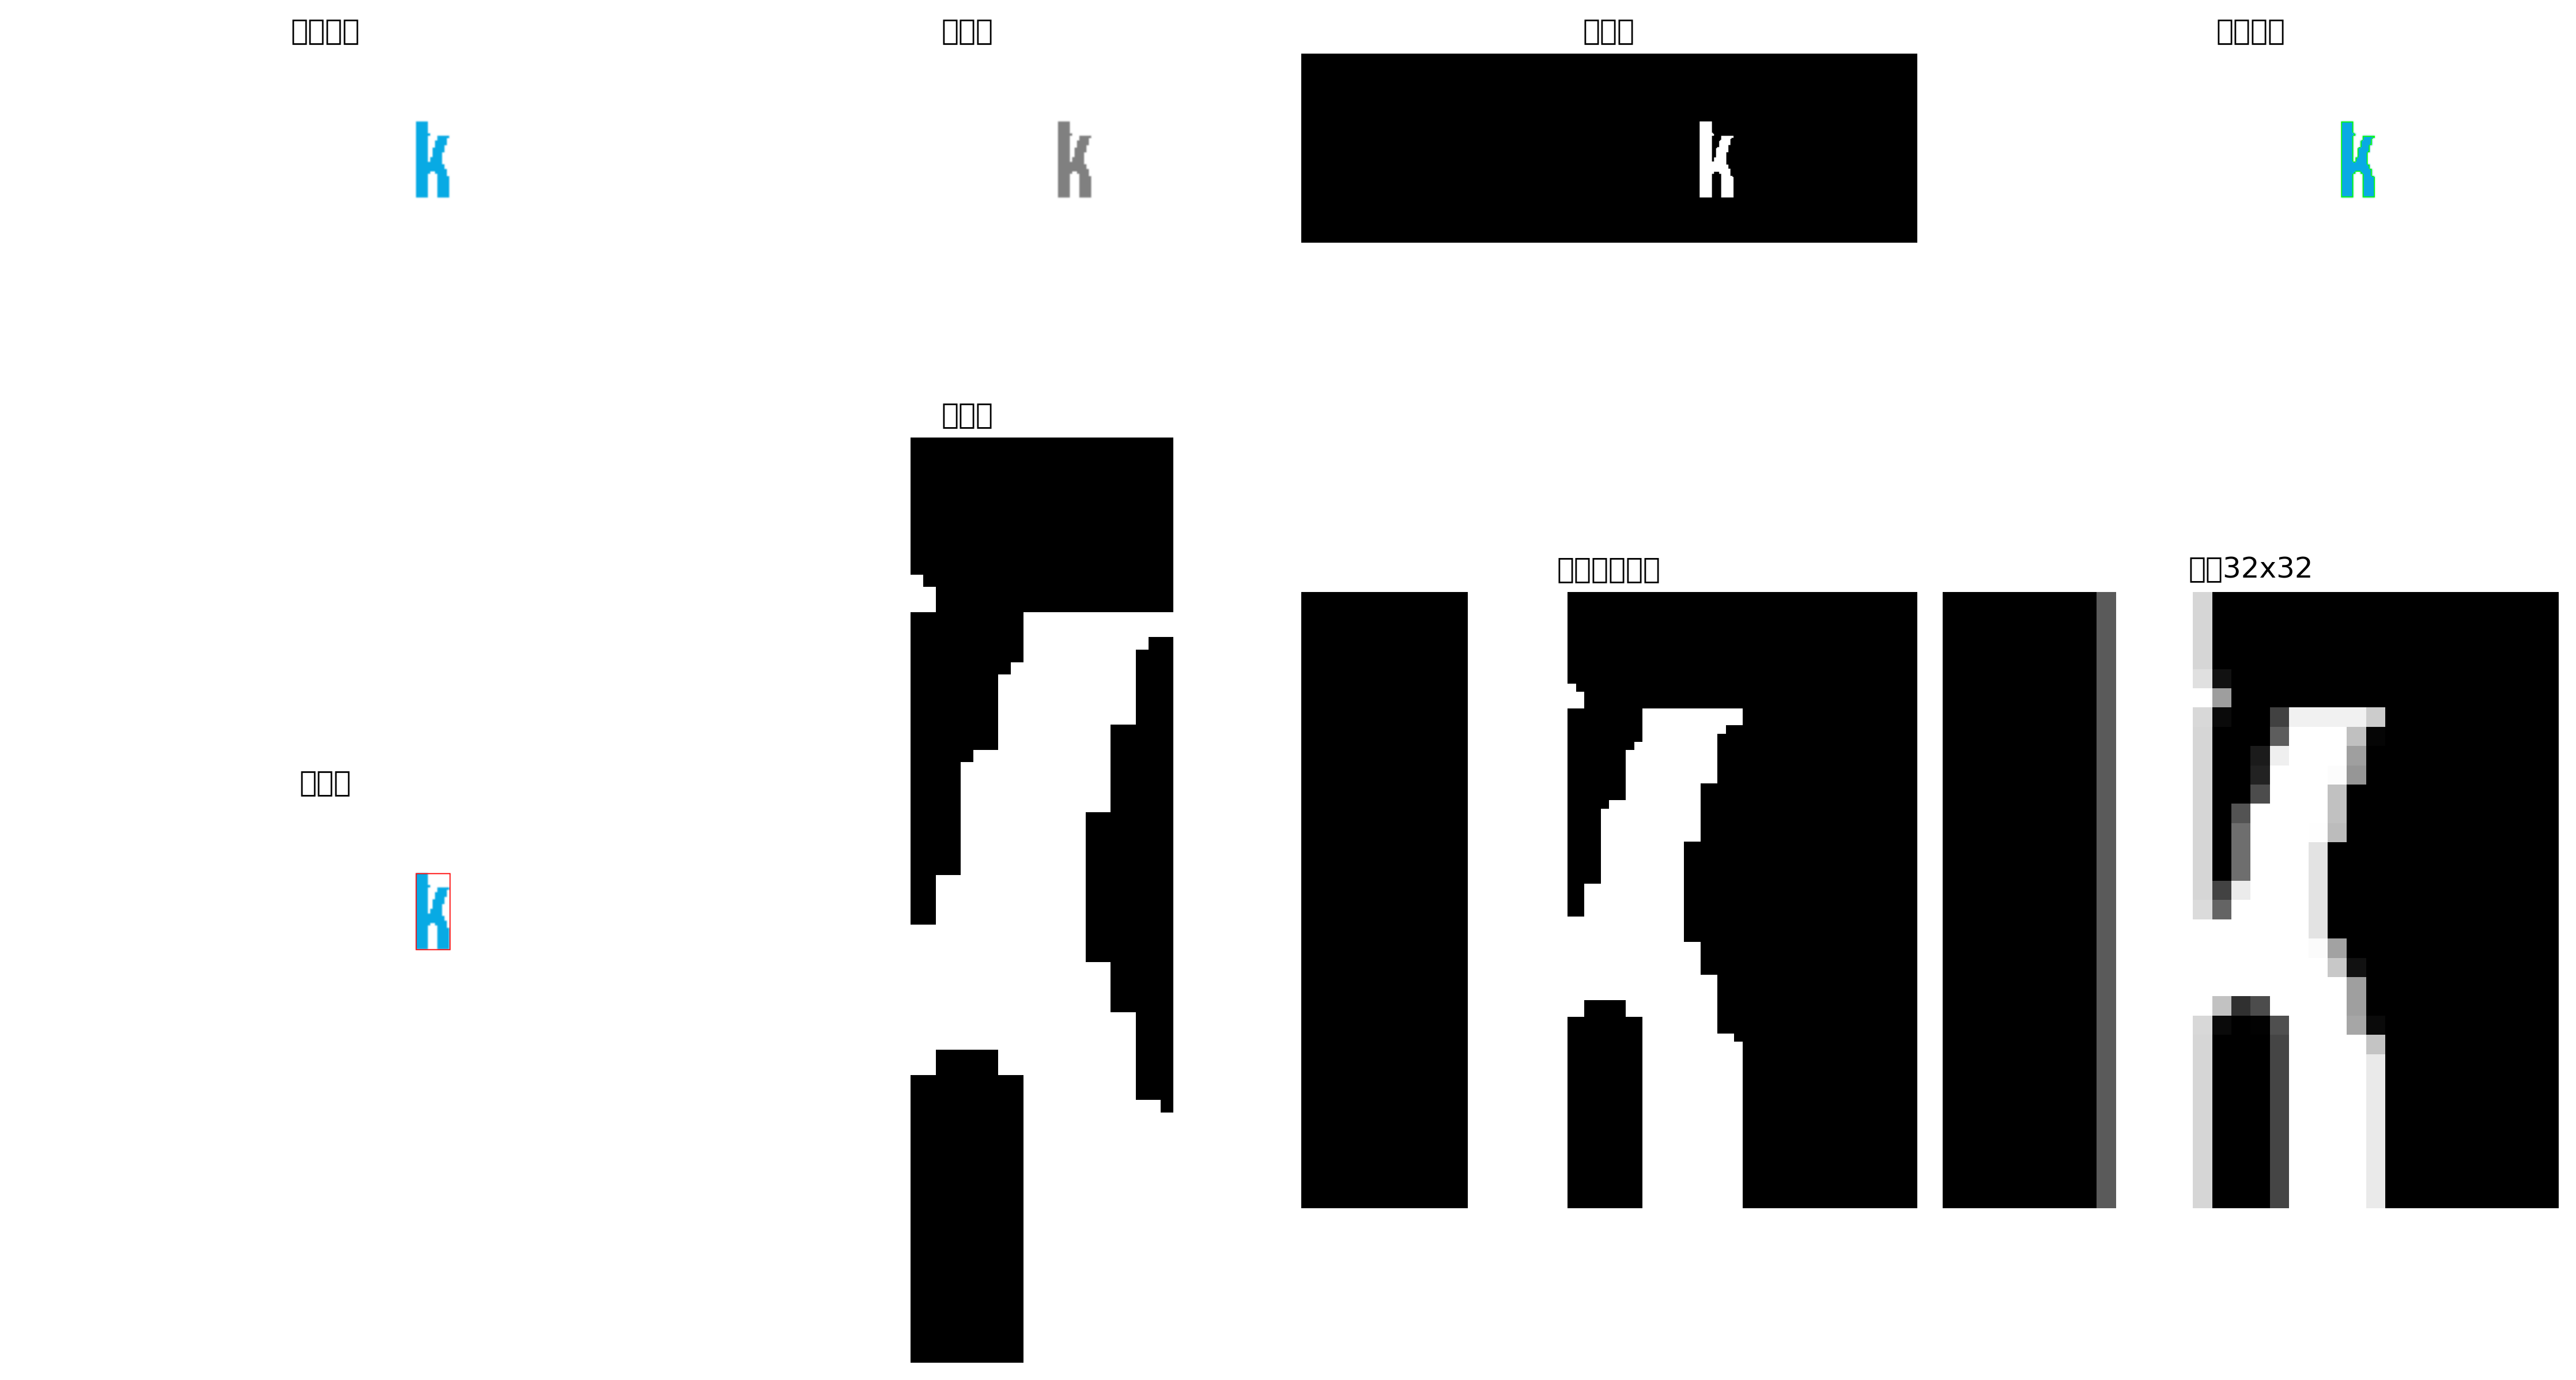

预处理步骤已保存到: ./preprocessing_steps
标准化后的图像形状: (32, 32)


In [ ]:
output_dir = "./preprocessing_steps"
os.makedirs(output_dir, exist_ok=True)

# example
char_img = cv2.imread("./segmat_train_filename/0tqk-k-1.png")
normalized_img, saved_steps = preprocess_char_image(
    char_img, 
    output_dir=output_dir,
    filename_prefix="example"
)

visualize_preprocessing(saved_steps)